In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

chips=pd.read_excel('/kaggle/input/quantium/QVI_transaction_data.xlsx')
chips1=pd.read_csv('/kaggle/input/quantium/QVI_purchase_behaviour.csv')


In [2]:
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:

chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [4]:
chips['DATE']=pd.to_datetime(chips['DATE'])
chips.dtypes


DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [5]:
chips1

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [6]:
chips1['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [7]:
chips1['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [8]:
chips['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [9]:
chips['PROD_NAME']=chips['PROD_NAME'].str.strip()
drop_product=chips[chips['PROD_NAME']== 'Old El Paso Salsa'].index
chips=chips.drop(drop_product)

In [10]:
chips['BRAND']=chips['PROD_NAME'].str.split().str.get(0)
chips['BRAND'].value_counts ()

BRAND
Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [11]:
chips['DATE']

0        1970-01-01 00:00:00.000043390
1        1970-01-01 00:00:00.000043599
2        1970-01-01 00:00:00.000043605
3        1970-01-01 00:00:00.000043329
4        1970-01-01 00:00:00.000043330
                      ...             
264831   1970-01-01 00:00:00.000043533
264832   1970-01-01 00:00:00.000043325
264833   1970-01-01 00:00:00.000043410
264834   1970-01-01 00:00:00.000043461
264835   1970-01-01 00:00:00.000043365
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [12]:
chips2=chips.sort_values(by='DATE')
chips2['DATE'].unique()

<DatetimeArray>
['1970-01-01 00:00:00.000043282', '1970-01-01 00:00:00.000043283',
 '1970-01-01 00:00:00.000043284', '1970-01-01 00:00:00.000043285',
 '1970-01-01 00:00:00.000043286', '1970-01-01 00:00:00.000043287',
 '1970-01-01 00:00:00.000043288', '1970-01-01 00:00:00.000043289',
 '1970-01-01 00:00:00.000043290', '1970-01-01 00:00:00.000043291',
 ...
 '1970-01-01 00:00:00.000043637', '1970-01-01 00:00:00.000043638',
 '1970-01-01 00:00:00.000043639', '1970-01-01 00:00:00.000043640',
 '1970-01-01 00:00:00.000043641', '1970-01-01 00:00:00.000043642',
 '1970-01-01 00:00:00.000043643', '1970-01-01 00:00:00.000043644',
 '1970-01-01 00:00:00.000043645', '1970-01-01 00:00:00.000043646']
Length: 364, dtype: datetime64[ns]

In [13]:
chips['SHORT_DATE']=pd.to_datetime(chips['DATE']).dt.strftime('%Y-%m-%d')
chips2=chips.groupby('DATE').count()
chips2.head()





,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,SHORT_DATE
DATE,,,,,,,,,
1970-01-01 00:00:00.000043282,724,724,724,724,724,724,724,724,724
1970-01-01 00:00:00.000043283,711,711,711,711,711,711,711,711,711
1970-01-01 00:00:00.000043284,722,722,722,722,722,722,722,722,722
1970-01-01 00:00:00.000043285,714,714,714,714,714,714,714,714,714
1970-01-01 00:00:00.000043286,712,712,712,712,712,712,712,712,712


In [14]:
set(pd.date_range('2018-07-01', end='2019-06-30',freq='D'))-set((chips2.index))
chips2.loc['2018-12-25']=np.nan
chips2[chips2.index=='2018-12-25']

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,SHORT_DATE
DATE,,,,,,,,,
2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
chips['BRAND']=chips['BRAND'].replace({'Dorito':'Doritos','Smith':'Smiths','Infzns':'Infuzions','RRD':'Red','Snbts':'Sunbites','Natural':'NCC','Old':'Old El Paso'})
chips['BRAND'].value_counts()

BRAND
Kettle         41288
Smiths         31823
Doritos        28147
Pringles       25102
Red            17779
Infuzions      14201
Thins          14075
WW             10320
Cobs            9693
Tostitos        9471
Twisties        9454
Old El Paso     9324
NCC             7469
Tyrrells        6442
Grain           6272
Cheezels        4603
CCs             4551
Woolworths      4437
Sunbites        3008
Cheetos         2927
Burger          1564
GrnWves         1468
French          1418
Name: count, dtype: int64

In [16]:
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,SHORT_DATE
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NCC,1970-01-01
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,1970-01-01
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,1970-01-01
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,1970-01-01
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,1970-01-01
...,...,...,...,...,...,...,...,...,...,...
264831,1970-01-01 00:00:00.000043533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,1970-01-01
264832,1970-01-01 00:00:00.000043325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,1970-01-01
264833,1970-01-01 00:00:00.000043410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,1970-01-01
264834,1970-01-01 00:00:00.000043461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,1970-01-01


In [17]:
chips_merged=pd.merge(chips,chips1,on='LYLTY_CARD_NBR',how='left')
chips_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,SHORT_DATE,LIFESTAGE,PREMIUM_CUSTOMER
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NCC,1970-01-01,YOUNG SINGLES/COUPLES,Premium
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,1970-01-01,MIDAGE SINGLES/COUPLES,Budget
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,1970-01-01,MIDAGE SINGLES/COUPLES,Budget
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,1970-01-01,MIDAGE SINGLES/COUPLES,Budget
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,1970-01-01,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,1970-01-01 00:00:00.000043533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,1970-01-01,YOUNG SINGLES/COUPLES,Premium
264832,1970-01-01 00:00:00.000043325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,1970-01-01,YOUNG SINGLES/COUPLES,Premium
264833,1970-01-01 00:00:00.000043410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,1970-01-01,YOUNG SINGLES/COUPLES,Premium
264834,1970-01-01 00:00:00.000043461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,1970-01-01,YOUNG SINGLES/COUPLES,Premium


In [18]:
chips_merged['WEIGHT']=chips_merged['PROD_NAME'].str[-4:-1]
chips_merged = chips_merged.drop(chips_merged[chips_merged['WEIGHT'] == 'Sal'].index)
chips_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,SHORT_DATE,LIFESTAGE,PREMIUM_CUSTOMER,WEIGHT
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NCC,1970-01-01,YOUNG SINGLES/COUPLES,Premium,175
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,1970-01-01,MIDAGE SINGLES/COUPLES,Budget,175
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,1970-01-01,MIDAGE SINGLES/COUPLES,Budget,170
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,1970-01-01,MIDAGE SINGLES/COUPLES,Budget,175
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,1970-01-01,MIDAGE SINGLES/COUPLES,Budget,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,1970-01-01 00:00:00.000043533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,1970-01-01,YOUNG SINGLES/COUPLES,Premium,175
264832,1970-01-01 00:00:00.000043325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,1970-01-01,YOUNG SINGLES/COUPLES,Premium,175
264833,1970-01-01 00:00:00.000043410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,1970-01-01,YOUNG SINGLES/COUPLES,Premium,170
264834,1970-01-01 00:00:00.000043461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,1970-01-01,YOUNG SINGLES/COUPLES,Premium,150


In [19]:
chips_edited=chips_merged.drop(['DATE'],axis=1)
chips_edited

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,SHORT_DATE,LIFESTAGE,PREMIUM_CUSTOMER,WEIGHT
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NCC,1970-01-01,YOUNG SINGLES/COUPLES,Premium,175
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,1970-01-01,MIDAGE SINGLES/COUPLES,Budget,175
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,1970-01-01,MIDAGE SINGLES/COUPLES,Budget,170
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,1970-01-01,MIDAGE SINGLES/COUPLES,Budget,175
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,1970-01-01,MIDAGE SINGLES/COUPLES,Budget,150
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,1970-01-01,YOUNG SINGLES/COUPLES,Premium,175
264832,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,1970-01-01,YOUNG SINGLES/COUPLES,Premium,175
264833,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,1970-01-01,YOUNG SINGLES/COUPLES,Premium,170
264834,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,1970-01-01,YOUNG SINGLES/COUPLES,Premium,150


In [20]:
chips_edited.to_csv('chips_edited.csv')

[Text(0.5, 1.0, 'Sales Average by Customer Segment'),
 Text(0.5, 0, 'Customer Segment'),
 Text(0, 0.5, 'Sales Average')]

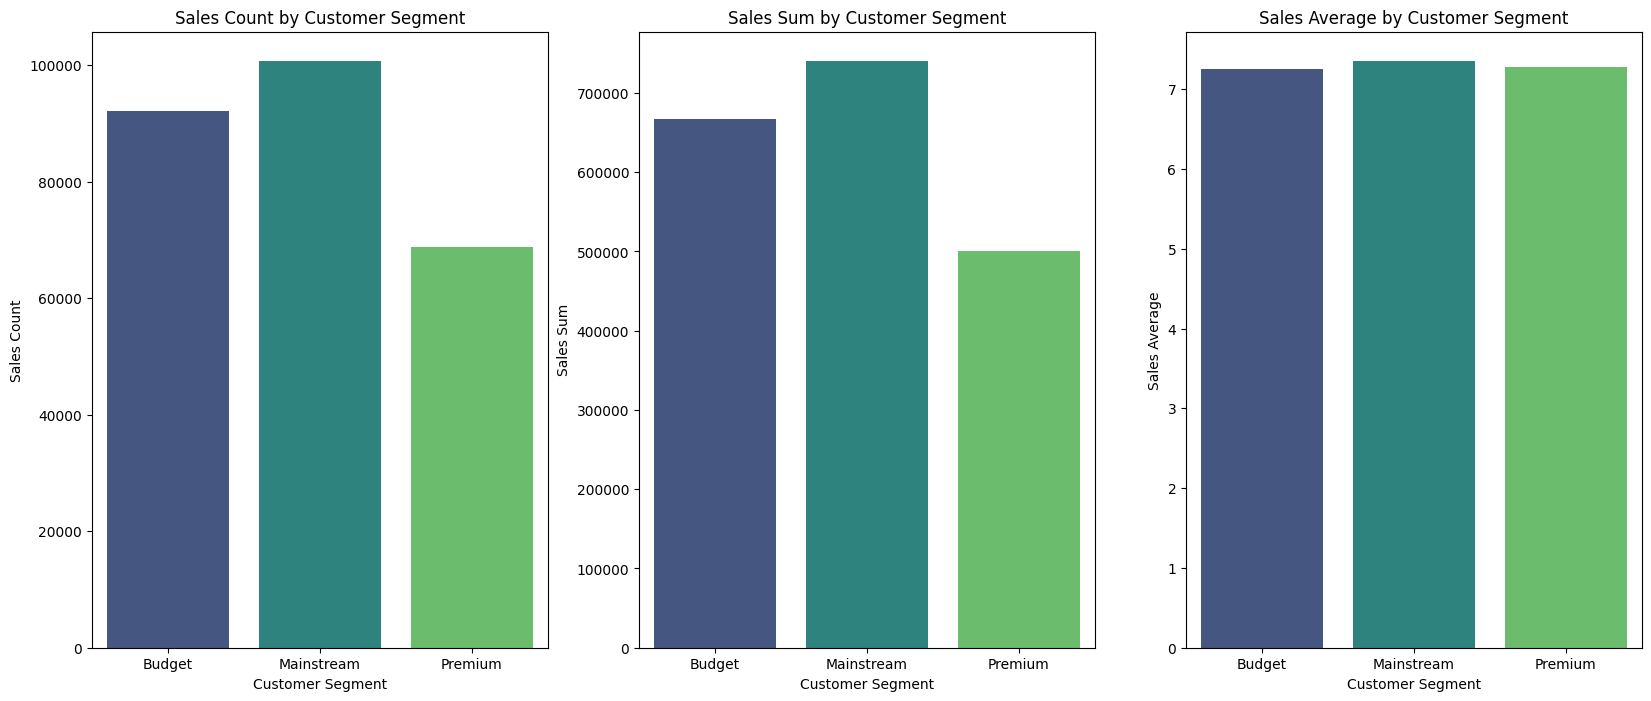

In [21]:
cols = ['PREMIUM_CUSTOMER', 'PROD_QTY', 'TOT_SALES'] 
grps = ['PREMIUM_CUSTOMER'] 

premsales_count = chips_edited.loc[:, cols].groupby(grps).count()
premsales_sum = chips_edited.loc[:, cols].groupby(grps).sum()
premsales_mean = chips_edited.loc[:, cols].groupby(grps).mean()
fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(131)
sns.barplot(data = premsales_count,
           x = premsales_count.index,
           y = premsales_count.TOT_SALES,
           palette = 'viridis'
           ).set(title='Sales Count by Customer Segment',
                 xlabel ="Customer Segment", ylabel = "Sales Count") 

ax2 = fig.add_subplot(132)
sns.barplot(data = premsales_sum,
           x = premsales_sum.index,
           y = premsales_sum.TOT_SALES,
           palette = 'viridis'
           ).set(title='Sales Sum by Customer Segment',
                 xlabel ="Customer Segment", ylabel = "Sales Sum")

ax3 = fig.add_subplot(133) 
sns.barplot(data = premsales_mean,
           x = premsales_mean.index,
           y = premsales_mean.TOT_SALES,
           palette = 'viridis'
           ).set(title='Sales Average by Customer Segment',
                 xlabel ="Customer Segment", ylabel = "Sales Average")

([<matplotlib.patches.Wedge at 0x78bc0e54fa90>,
 [Text(0.38926616509327117, 1.0288206125042296, 'Mainstream'),
  Text(-1.020612230667769, -0.41030558686345125, 'Budget'),
  Text(0.7449278675182677, -0.8093716527002206, 'Premium')],
 [Text(0.21232699914178424, 0.5611748795477616, '38%'),
  Text(-0.5566975803642376, -0.2238030473800643, '35%'),
  Text(0.4063242913736005, -0.441475446927393, '26%')])

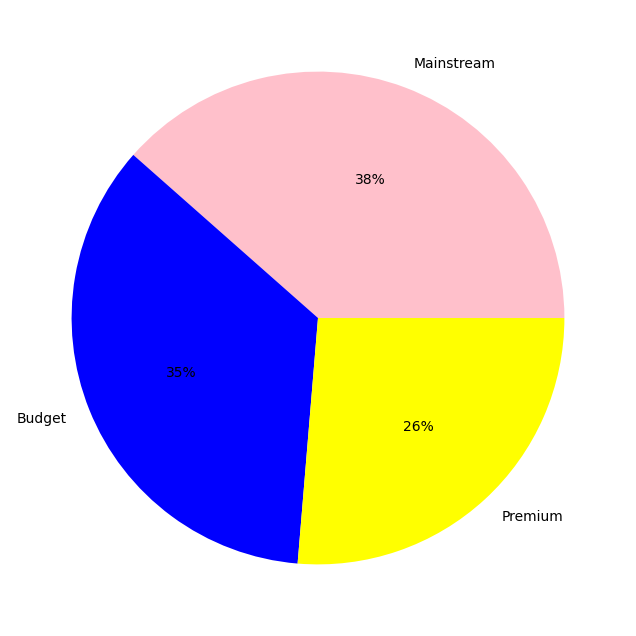

In [22]:
labels = chips_edited.PREMIUM_CUSTOMER.value_counts().index
colours = {'Budget': 'Blue',
           'Mainstream': 'Pink',
           'Premium': 'Yellow'}

plt.figure(figsize = (8, 8))
plt.pie(chips_edited.PREMIUM_CUSTOMER.value_counts(), 
        labels = labels, 
        colors = [colours[key] for key in labels], 
        autopct='%.0f%%')

<Axes: title={'center': 'Average Sales by Brand and Weight'}, xlabel='Sales Count', ylabel='Brand'>

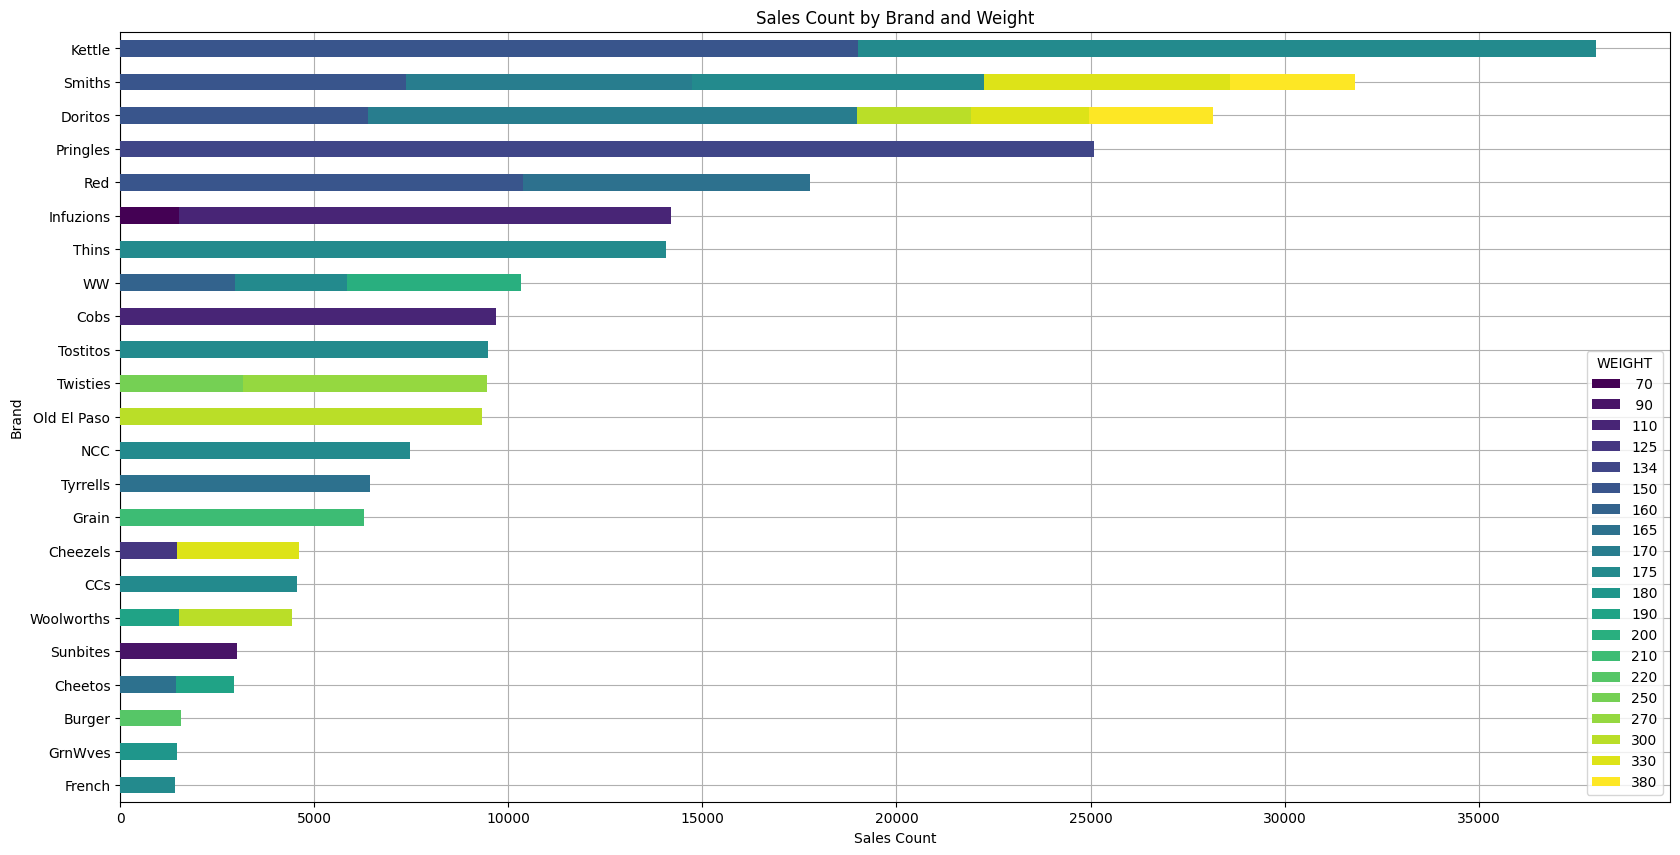

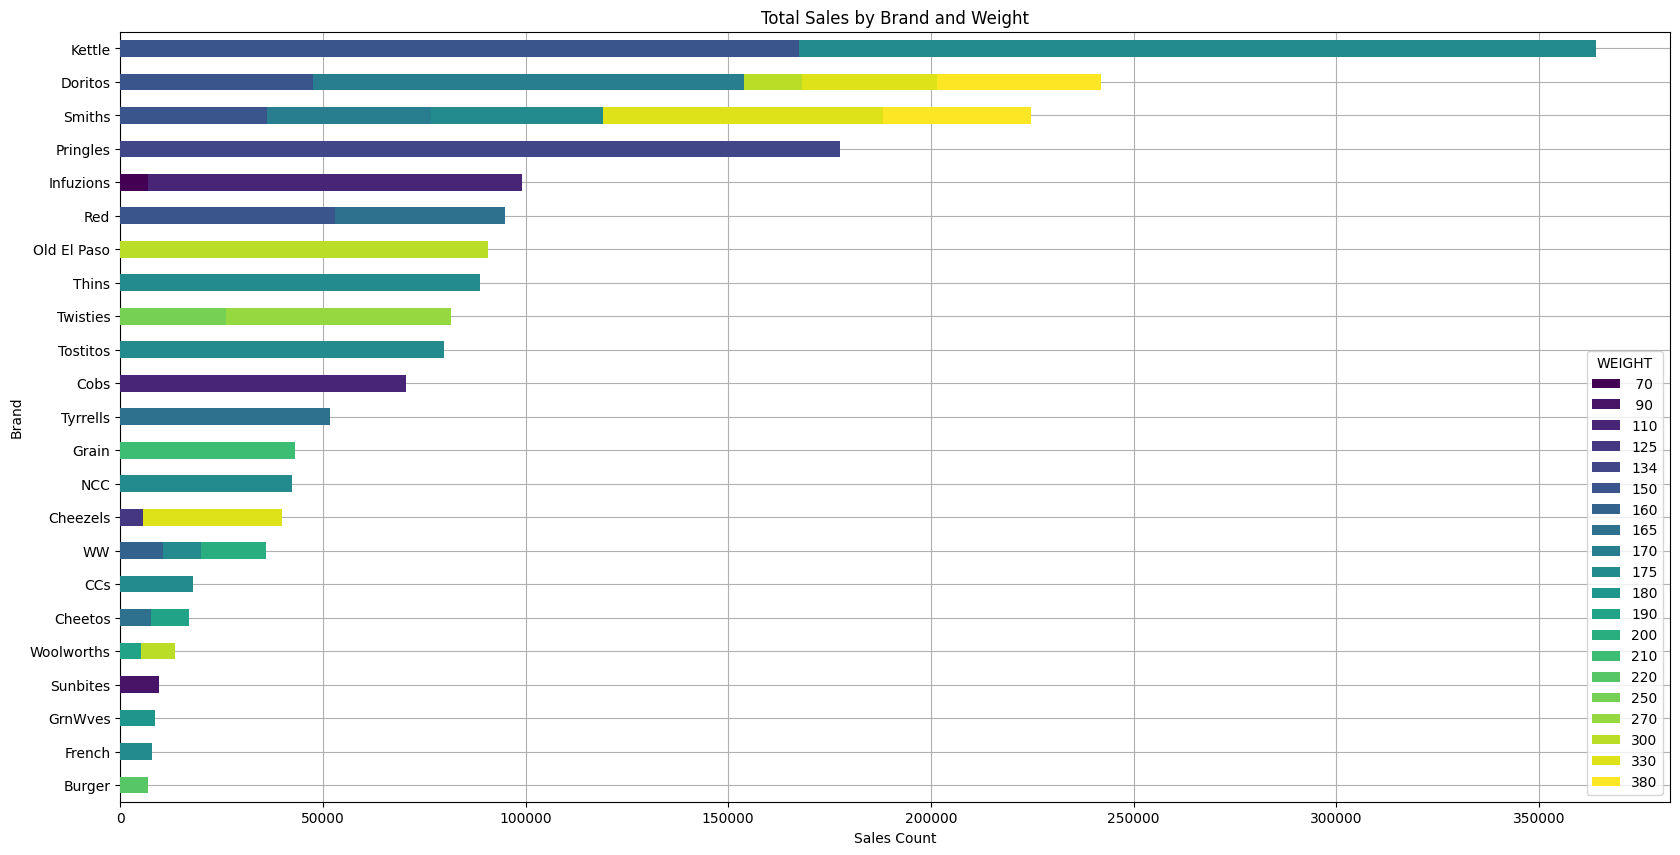

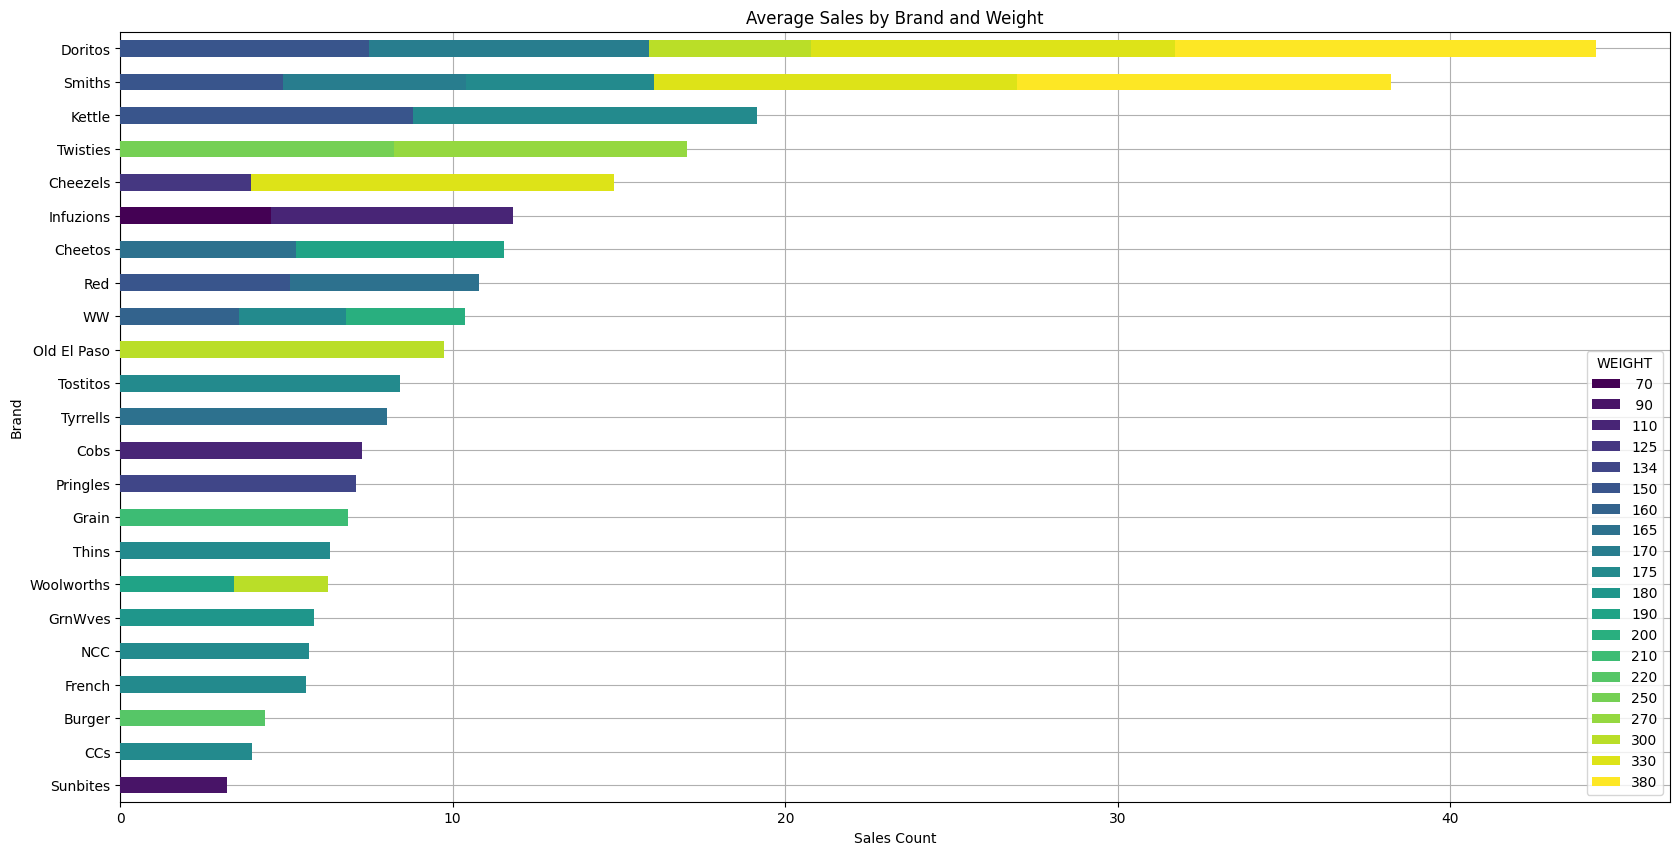

In [23]:
cols = ['BRAND', 'WEIGHT', 'TOT_SALES']
grps = ['BRAND', 'WEIGHT'] 

brandsizesales_count = chips_edited.loc[:, cols].groupby(grps).count()
brandsizesales_sum = chips_edited.loc[:, cols].groupby(grps).sum()
brandsizesales_mean =  chips_edited.loc[:, cols].groupby(grps).mean()

temp_df1 = brandsizesales_count.unstack()
temp_df1['SUM'] = brandsizesales_count.unstack().sum(axis=1)

temp_df2 = brandsizesales_sum.unstack()
temp_df2['SUM'] = brandsizesales_sum.unstack().sum(axis=1)

temp_df3=brandsizesales_mean.unstack()
temp_df3['SUM'] = brandsizesales_mean.unstack().sum(axis=1)


temp_df1.sort_values('SUM').TOT_SALES.plot(kind='barh', 
                                          stacked=1, 
                                          title = 'Sales Count by Brand and Weight',
                                          xlabel = 'Sales Count',
                                          ylabel = 'Brand',
                                          figsize = (20,10),
                                          grid = 1,
                                          zorder = 4,
                                          colormap = 'viridis'
                                          )

temp_df2.sort_values('SUM').TOT_SALES.plot(kind='barh', 
                                          stacked=1, 
                                          title = 'Total Sales by Brand and Weight',
                                          xlabel = 'Sales Count',
                                          ylabel = 'Brand',
                                          figsize = (20,10),
                                          grid = 1,
                                          zorder = 4,
                                          colormap = 'viridis'
                                          )


temp_df3.sort_values('SUM').TOT_SALES.plot(kind='barh', 
                                          stacked=1, 
                                          title = 'Average Sales by Brand and Weight',
                                          xlabel = 'Sales Count',
                                          ylabel = 'Brand',
                                          figsize = (20,10),
                                          grid = 1,
                                          zorder = 4,
                                          colormap = 'viridis'
                                          )

Text(0.5, 1.0, 'Weight')

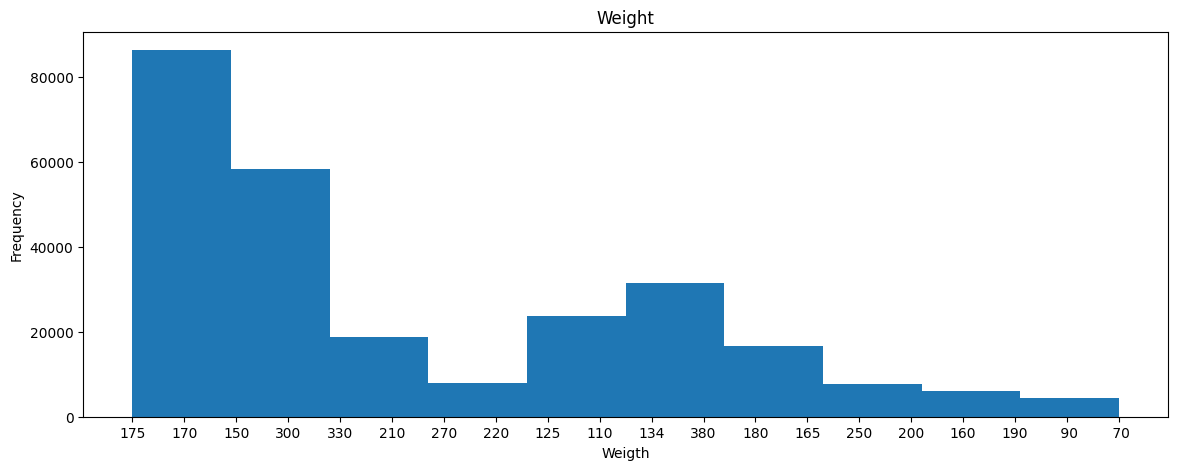

In [24]:
plt.figure(figsize = (14, 5))
plt.hist(chips_edited['WEIGHT'])     
plt.xlabel('Weigth')
plt.ylabel('Frequency')
plt.title('Weight')

In [25]:
chips_edited['CHIP_PRICE']=chips_edited['TOT_SALES']/chips_edited['PROD_QTY']
b=chips_edited[['LIFESTAGE','PREMIUM_CUSTOMER','CHIP_PRICE']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).mean()
b.sort_values("CHIP_PRICE",ascending=False)

CHIP_PRICE
PREMIUM_CUSTOMER LIFESTAGE                         
Mainstream       YOUNG SINGLES/COUPLES     4.069672
                 MIDAGE SINGLES/COUPLES    3.997319
Budget           RETIREES                  3.921382
Premium          RETIREES                  3.917527
Budget           NEW FAMILIES              3.915656
Mainstream       NEW FAMILIES              3.911745
Premium          OLDER SINGLES/COUPLES     3.883331
Budget           OLDER SINGLES/COUPLES     3.872701
Premium          NEW FAMILIES              3.868825
Mainstream       RETIREES                  3.828795
                 OLDER SINGLES/COUPLES     3.797672
Budget           YOUNG FAMILIES            3.748655
Premium          MIDAGE SINGLES/COUPLES    3.747685
                 YOUNG FAMILIES            3.746758
Budget           OLDER FAMILIES            3.727881
                 MIDAGE SINGLES/COUPLES    3.723657
Mainstream       OLDER FAMILIES            3.722793
                 YOUNG FAMILIES            3.701497
Premium          OLDER FAMILIES            3.698766
                 YOUNG SINGLES/COUPLES     3.639269
Budget           YOUNG SINGLES/COUPLES     3.632027

<Axes: xlabel='LIFESTAGE', ylabel='TOT_SALES'>

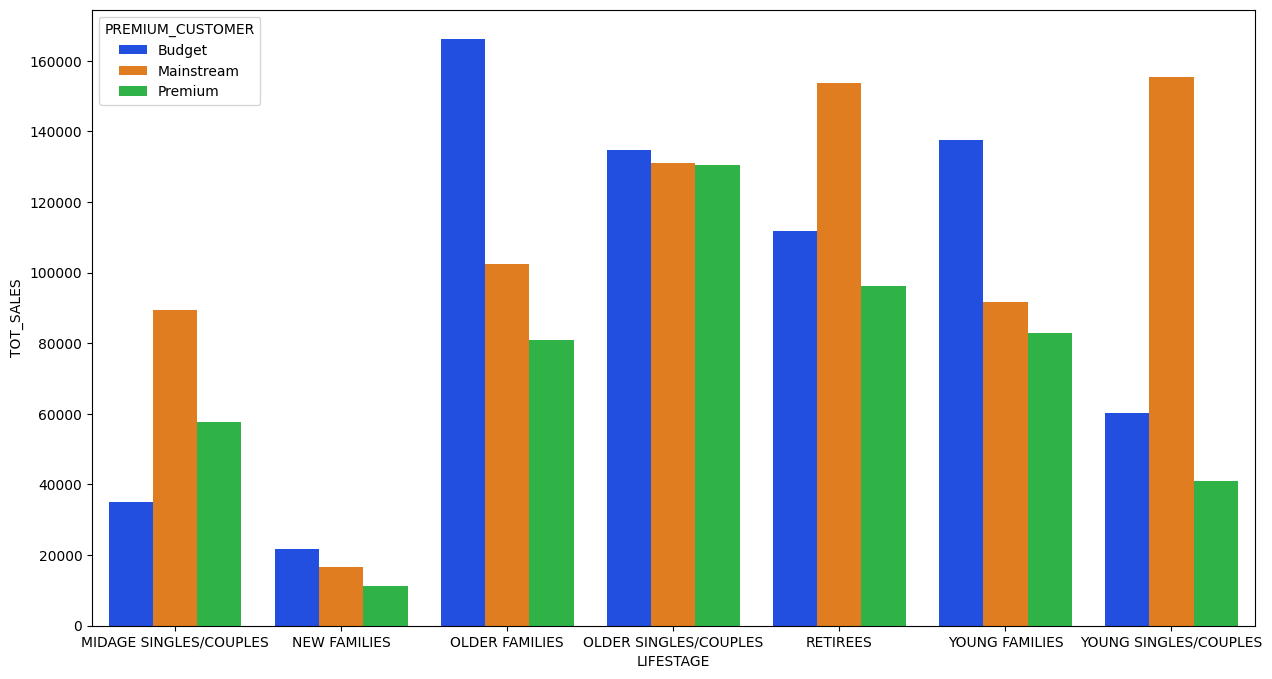

In [26]:
a=chips_edited[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()
a.sort_values('TOT_SALES',ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(y=a.reset_index()['TOT_SALES'],x=a.reset_index()['LIFESTAGE'],hue=a.reset_index()['PREMIUM_CUSTOMER'],palette='bright')


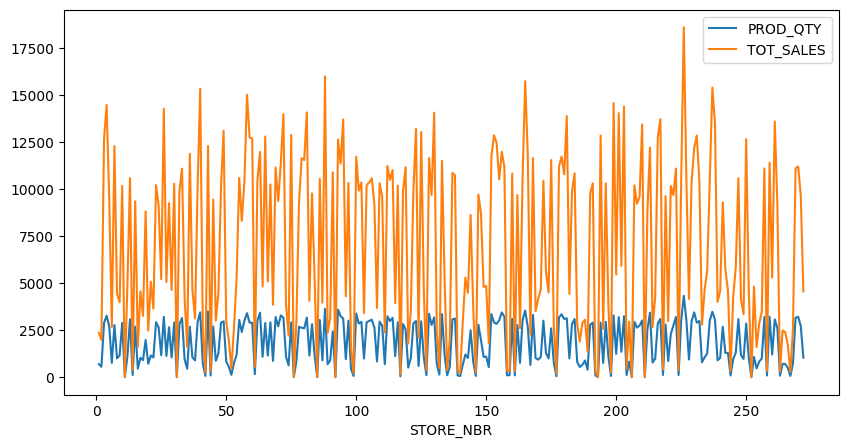

In [27]:
chips_edited.groupby(by='STORE_NBR')[['PROD_QTY','TOT_SALES']].sum().plot(figsize=(10,5))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

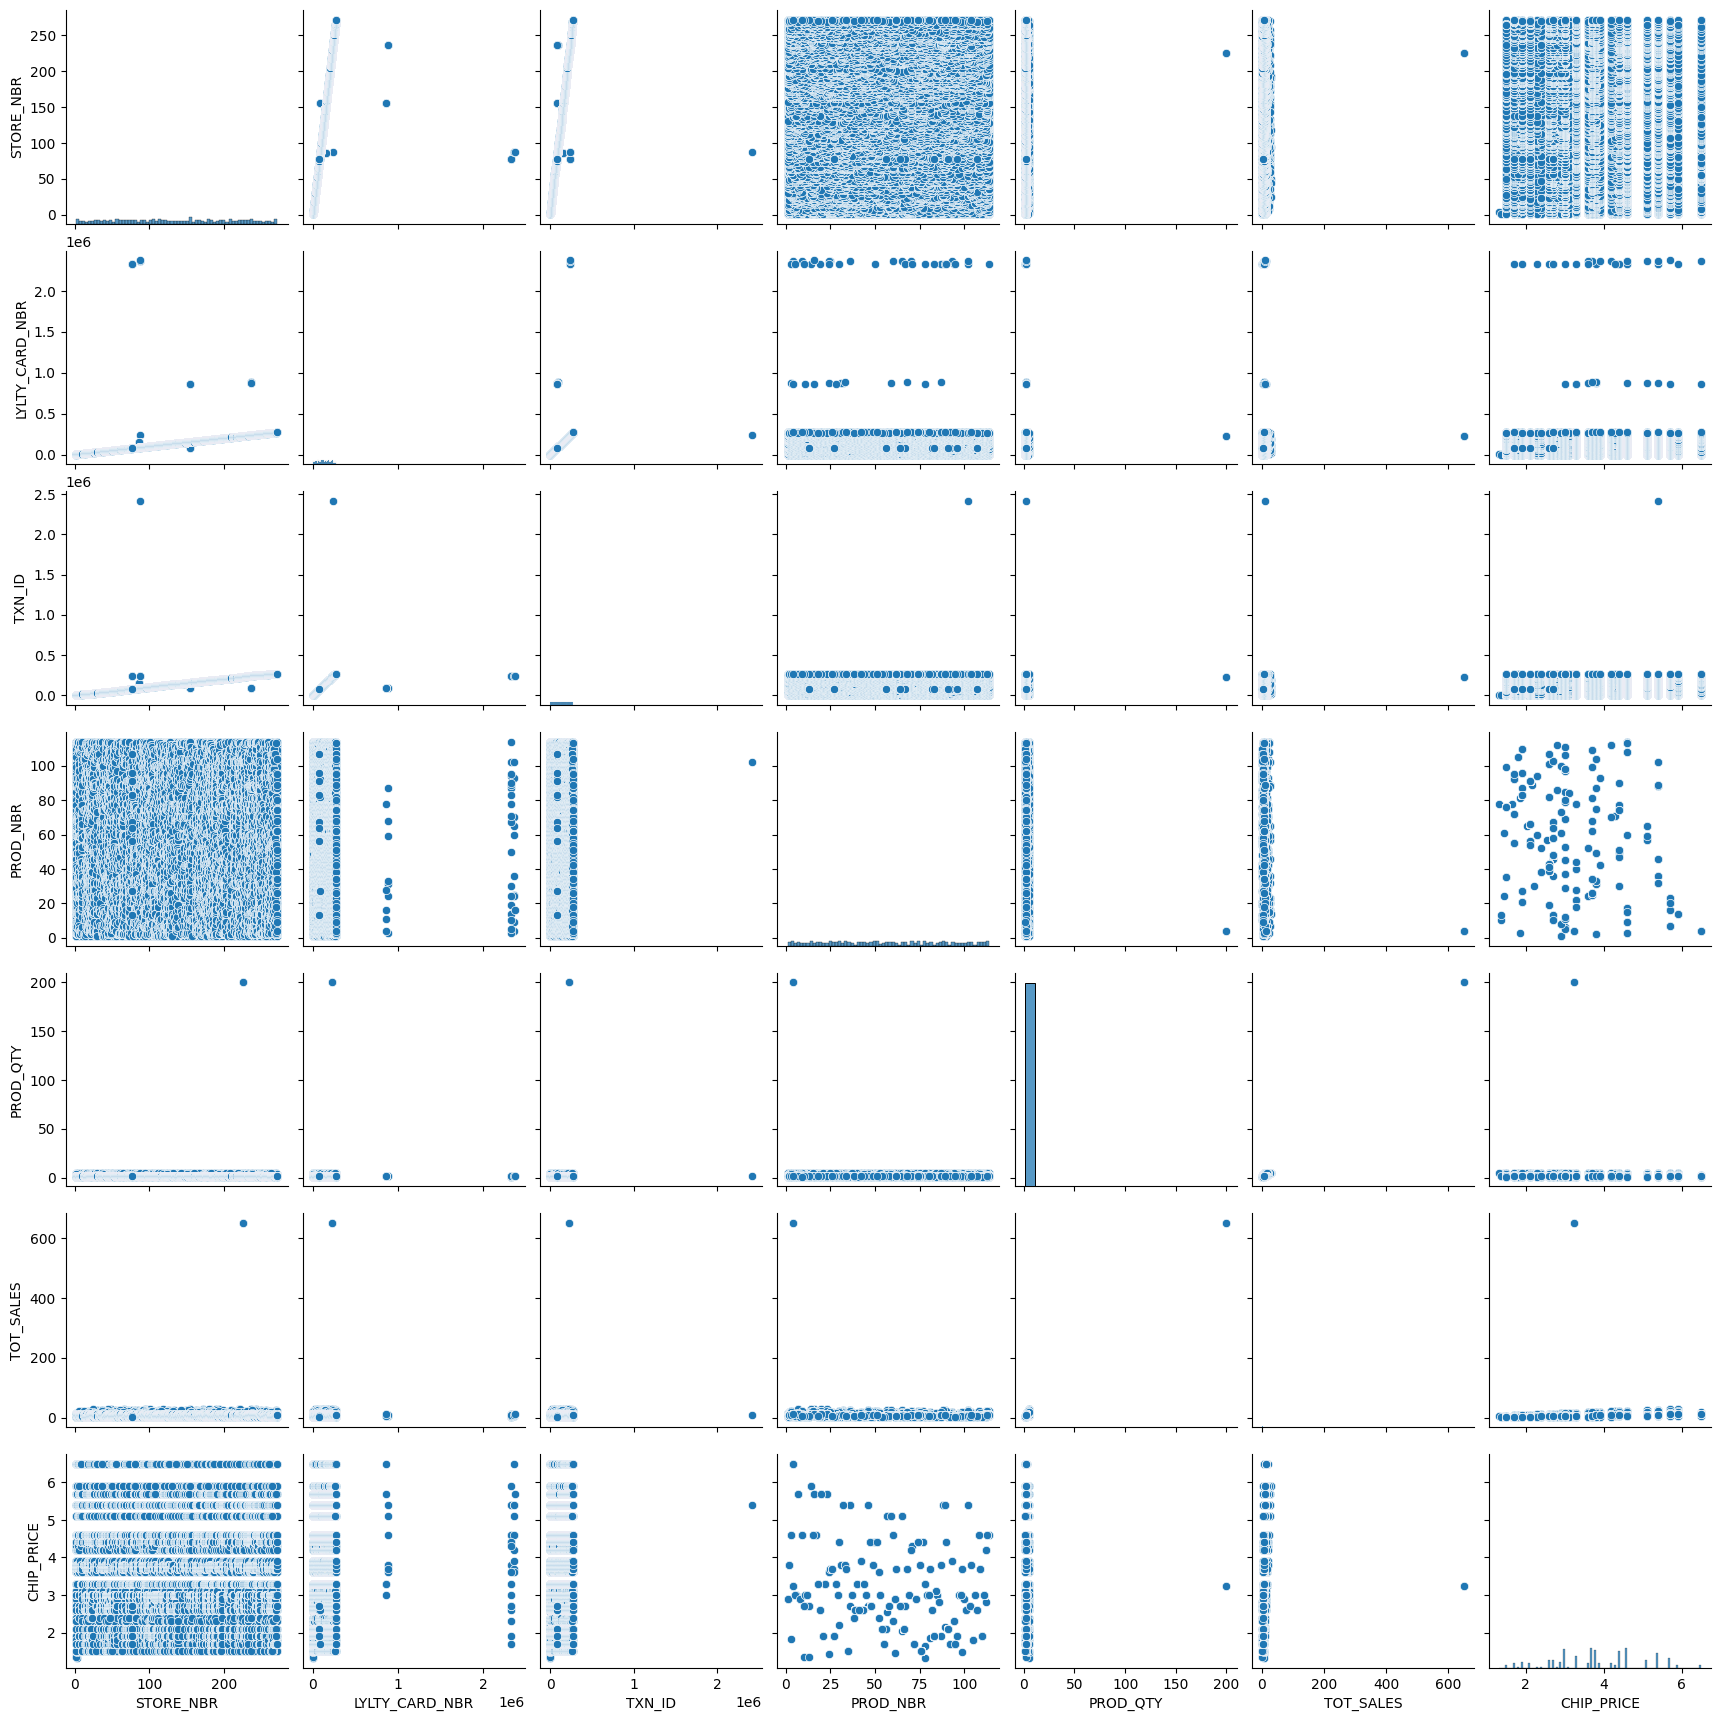

In [28]:
sns.pairplot(data=chips_edited[chips_edited.columns.drop('PROD_NAME')])